In [1]:
#!/usr/bin/env python
# coding: utf-8
import numpy as np
import pandas as pd
import xarray as xr
from glob import glob
import matplotlib.pyplot as plt
#import nc_time_axis
import cftime
from dask.diagnostics import ProgressBar
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import warnings
warnings.simplefilter('ignore')
import datetime
import csv
import os 
#import bottleneck as bn
import sys
import intake

In [2]:
BASE = "http://esgf-data.ucar.edu/thredds/dodsC/esg_dataroot/CMIP6/"
EXP = "CMIP/NCAR/CESM2/historical/r1i1p1f1/Omon/"#,"ScenarioMIP/NCAR/CESM2/ssp585/r1i1p1f1/Omon/"]
VAR = ["thetao","so"]
GRID = "/gr/"
thetao_hist = 'v20190308/thetao_Omon_CESM2_historical_r1i1p1f1_gr_185001-201412.nc'
so_hist = 'v20190308/so_Omon_CESM2_historical_r1i1p1f1_gr_185001-201412.nc'

# thetao_ssp585a = 'v20190730/thetao_Omon_CESM2_ssp585_r1i1p1f1_gr_201501-206412.nc'
# thetao_ssp585b = 'v20190730/thetao_Omon_CESM2_ssp585_r1i1p1f1_gr_206501-210012.nc'
# so_ssp585a = 'v20190730/so_Omon_CESM2_ssp585_r1i1p1f1_gr_201501-206412.nc'
# so_ssp585b = 'v20190730/so_Omon_CESM2_ssp585_r1i1p1f1_gr_206501-210012.nc'

for i in VAR
    url = BASE + EXP + VAR(i) + GRID + thetao_hist
    ds = xr.open_dataset(url)


    sst = ds['thetao'].sel(lev = 0, lat=slice(26,28), lon=slice(267,274)).loc['2007-01-01':'2010-12-01']
    lat = sst['lat']
    lon = sst['lon']
    time = sst['time']

    sst_ts = sst.mean(dim = ('lon','lat')).drop('lev')

    sst_ts = np.array(sst_ts)
    sst_ts

array([22.932632, 22.266443, 22.161678, 23.01295 , 25.606287, 28.025864,
       29.288603, 30.125427, 29.882883, 28.593824, 26.571226, 24.52091 ,
       23.204672, 23.68495 , 24.269705, 25.579107, 27.1431  , 28.617672,
       29.9668  , 30.366882, 30.621029, 29.511248, 27.547468, 26.360691,
       25.384504, 24.471655, 24.200594, 25.053469, 26.626175, 28.16772 ,
       29.599962, 30.161839, 30.427212, 29.158758, 27.294374, 25.400097,
       23.620268, 22.681551, 23.226564, 24.778248, 26.224316, 28.511133,
       30.042067, 30.821436, 30.288927, 28.982   , 27.568516],
      dtype=float32)

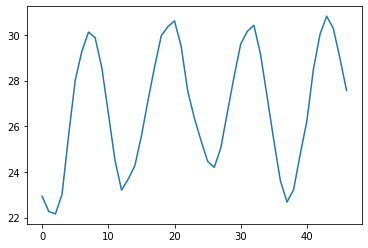

In [7]:
#sst.isel(time = range(200,500)).plot();
#sst_ts.plot()
fig = plt.figure()
ax = plt.axes()
#x = np.array(time)
ax.plot(sst_ts);

In [33]:
#sst_ts.attrs

OrderedDict()